# 03-3 특성 공학과 규제

### 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 <span style="color:red">**특성 공학(feature engineering)**</span> 이라고 합니다.

## 1. 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np

[perch_csv_data](https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv)

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')   
perch_full = df.to_numpy()

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 2. 사이킷런의 변환기

In [5]:
from sklearn.preprocessing import PolynomialFeatures

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

- degree : 차수를 조절한다. = 제곱을 조절한다

- include_bias는 절편을 만드는 것입니다. include_bias = True이면 1 +ax + bx(제곱)와 같이 1 같은 절편을 추가합니다. False이면 추가하지 않습니다.

- transform from (x1, x2) to (1(bias), x1, x2, x1^2, x1*x2, x2^2)

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


##### 변환기는 타깃 데이터 없이 입력 데이터를 변환합니다.

In [7]:
poly = PolynomialFeatures(include_bias=False)
#훈련
poly.fit([[2, 3]])  #새롭게 만들 특성 조합을 찾는다.

#변환
print(poly.transform([[2, 3]]))   # 실제로 데이터를 변환한다.

[[2. 3. 4. 6. 9.]]


#### <span style="color:red">**y = ax + b**</span> 이런 일차식을 만들 때 a가 기울기 b가 절편 <br>
#### `[a, b]*[x, 1]` LinearRegression 클래스가 1 특성을 무시한다. 그래서 1을 생성하지않는다.

In [8]:
poly = PolynomialFeatures(include_bias=False)   

poly.fit(train_input)             # 실제로 뭔가를 학습하는게 아님, 특성이 몇개 있는지 특성을 이용해 어떤 특성을 만들 것인지
train_poly = poly.transform(train_input)     #변환기 (fit, transform)

In [9]:
print(train_poly.shape)   #42개의 샘플 9개의 배열

(42, 9)


In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)    #테스트도 똑같이 변환

## 3. 다중 회귀 모델 훈련하기

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()      # 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))     # 특성을 많이 넣었기 때문에 정확도가 올라간다.

0.9903183436982124


In [13]:
print(lr.score(test_poly, test_target))

0.9714559911594133


In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [15]:
print(train_poly.shape)     # 배열의 열의 개수 = 55

(42, 55)


In [16]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [17]:
print(lr.score(test_poly, test_target))

-144.40579242684694


### 결과 : 특성 개수를 늘리면 훈련 데이터를 완벽하게 학습할 수 있지만 오버피팅을 일으킬 수 있다.

## ※ 규제

## <span style="color:blue">**규제는 극도로 과대적합을 완화하는 기법**</span> <br><br>  <span style="color:red">가중치(기울기) 값을 작게하는 것, 줄이는 것</span>

#### sklearn에서 제공하는 변환기 ex) 가위바위보 맞추기에서 0~1 사이로 값을 바꿨던 것

In [18]:
from sklearn.preprocessing import StandardScaler     #LinearRegression 수치적인 반복으로 계산하기 때문에 크기의 영향을 받지 않는다.

ss = StandardScaler()
ss.fit(train_poly)

# 훈련 데이터와 시험 데이터 scale은 같아야한다.
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## (1) 릿지 회귀

### 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부릅니다<br>
##### 릿지와 라쏘 모두 sklearn.linaer_model 패키지 안에 있습니다

### 릿지 회귀가 규제하는 방법 => 가중치에 제곱을 벌칙으로 준다 = (L2규제) 선형회귀에 적용된 모델

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge()    #alpha = 1
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [20]:
print(ridge.score(test_scaled, test_target))

0.9790693977615388


In [21]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [22]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

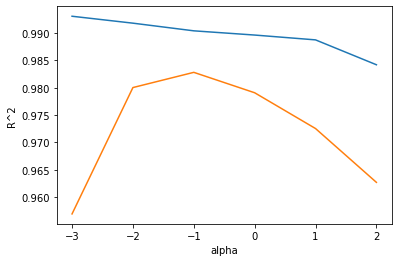

In [23]:
plt.plot(np.log10(alpha_list), train_score)        #np에서 제공하는 log함수 사용
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

**위는 훈련 세트 그래프, 아래는 테스트 세트 그래프입니다. 이 그래프의 왼쪽을 보면 훈련 세트와 테스트 세트의 점수차가 큽니다. 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습이죠. 반대로 오른쪽 편은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보입니다**

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.982797646538695


## (2) 라쏘 회귀

### 라쏘 회귀가 규제하는 방법 => |가중치| = 가중치의 절대값을 벌칙으로 준다. = L1규제 (선형회귀에 적용된 모델)

라쏘 회귀에서는 일부 특성을 완전히 사용안 할 수 있다. 특성마다 가중치를 곱하는데 가중치를 0으로 만들면 특성이 의미가 없어진다.

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [26]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [27]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10,   100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


사이킷런의 라쏘 모델은 최적의 개수를 찾기 위해 반복적인 계산을 수행하는데 지정한 반복 횟수가 부족할 때 경고가 발생합니다. 이 반복 횟수를 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정했습니다.

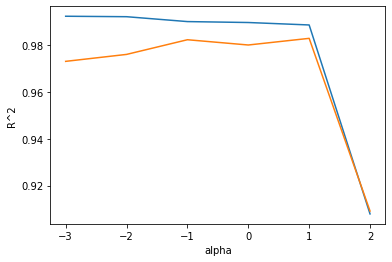

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
print(np.sum(lasso.coef_ == 0))     #가중치를 0으로 한 것의 개수

40
